# Homework sheet 2

## Exercise 2

In [1]:
# Imports
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
from scipy.special import roots_legendre # coefficients for Gauss-Legendre quadrature rule

### Calculation of the A field

In [2]:
def distance(x, y, z, phi):
    return np.sqrt( (x - cos(phi))**2 + (y - sin(phi))**2 + z**2 )

In [3]:
n_step = 100
dp = 2*pi/n_step
phis = np.linspace(0, 2*pi-dp, n_step)
w = 100
c = 10000

def calc_A(x, y, z, t):
    A = np.zeros(3)
    for i in range(n_step):
        phi = i * dp
        e = np.array([-sin(phi), cos(phi), 0.])
        tr = t - distance(x, y, z, phi) / c
        A += tr * sin(w*tr) * e / distance(x, y, z, phi)
    return A * dp / c**2

def Afield(x, y, z, t):
    A = np.array([0., 0., 0.])
    r = np.array([x, y, z])

    for i in range(n_step):
        p = i * dp
        rp = np.array([cos(p), sin(p), 0.])
        ep = np.array([-sin(p), cos(p), 0.])
        dist = np.linalg.norm(r - rp)
        tr = t - dist/c
        A += (tr>0) * sin(w*tr) * ep / dist * dp
    return A / c**2

def A(x, y, z, t):
    A = np.zeros(3)
    for phi in phis:
        e = np.array([-sin(phi), cos(phi), 0.])
        tr = t - distance(x, y, z, phi) / c
        A += tr * sin(w*tr) * e / distance(x, y, z, phi)
    return A / c**2 * dp

In [4]:
x, y, z, t = 10, 0, 0, 0.1

print(f'Calc_A:  A: {calc_A(x, y, z, t)}')
print(f'Afield:  A: {Afield(x, y, z, t)}')
print(f'A:       A: {A     (x, y, z, t)}')

Calc_A:  A: [-1.5940649e-26 -1.7203876e-11  0.0000000e+00]
Afield:  A: [-1.99222149e-25 -1.72317772e-10  0.00000000e+00]
A:       A: [-1.5940649e-26 -1.7203876e-11  0.0000000e+00]


In [5]:
w = 100
c = 10000
n_steps = 100

def Afield(x, y, z, t):
    nphi = n_steps
    dp = 2*pi/nphi
    A = np.array([0., 0., 0.])
    r = np.array([x, y, z])
    for ip in range(nphi):
        p = ip * dp
        rp = np.array([cos(p), sin(p), 0.])
        ep = np.array([-sin(p), cos(p), 0.])
        dist = np.linalg.norm(r - rp)
        tr = t - dist/c
        A += (tr>0) * sin(w*tr)/ dist * ep * dp
    return A / c**2

def A(x, y, z, t):
    dp = 2*pi/n_steps
    phis = np.linspace(0, 2*pi-dp, n_steps)
    A = np.zeros(3)
    for phi in phis:
        e = np.array([-sin(phi), cos(phi), 0.])
        tr = t - distance(x, y, z, phi) / c
        A += tr * sin(w*tr) * e / distance(x, y, z, phi)
    return A / c**2 * dp


Afield0 = []
A0 = []
for n in range(1, 1000, 1):
    n_steps = n
    Afield0.append(Afield(x, y, z, t)[0])
    A0.append(A(x, y, z, t)[0])

plt.plot(Afield0)
plt.plot(A0)
plt.legend(['Afield', 'A'])
plt.show()

x, y, z, t = 10, 0, 0, 0.1
print(f'Afield:  A: {Afield(x, y, z, t)}')
print(f'A:       A: {A     (x, y, z, t)}')

KeyboardInterrupt: 

In [6]:
def QuadRule(f, x, w):
    """
    Approximate integral using a quadrature rule
    -----------------------------------------
    Inputs :
    f: function to be integrated
    x: 1D array containing the nodes [x_0,...,x_n]
    w: 1D array containing the weights [w_0,...,w_n]
    
    Output
    the value of sum f(x_k)*w_k
    """
    S = 0
    for i in range(len(x)):
        S += f(x[i]) * w[i]
    return S

def coeffs_GaussLegendre(n):
    """
    computation of the nodes and weights for the Gaussian (or Gauss-Legendre) quadrature rule at any order
    ---------------------------------
    Inputs :
    n: degree of the rule (we want n+1 nodes)
    
    Outputs:
    x, w: 1D array containing the nodes and the weights
    """
    return roots_legendre(n)

In [11]:
a = 1
I = 1
w = 100
c = 10000

n = 10
dp = 2*pi/n

def A(x, y, z, t):
    A = np.zeros(3)
    x_nGL, w_nGL = coeffs_GaussLegendre(n)
    phis = (x_nGL + 1) * pi / 2

    def integral(phi):
        e = np.array([-sin(phi), cos(phi), 0.])
        tr = t - distance(x, y, z, phi) / c
        return tr * sin(w*tr) * e / distance(x, y, z, phi) / c**2 * dp
    
    A = QuadRule(integral, phis, w_nGL)
    return A

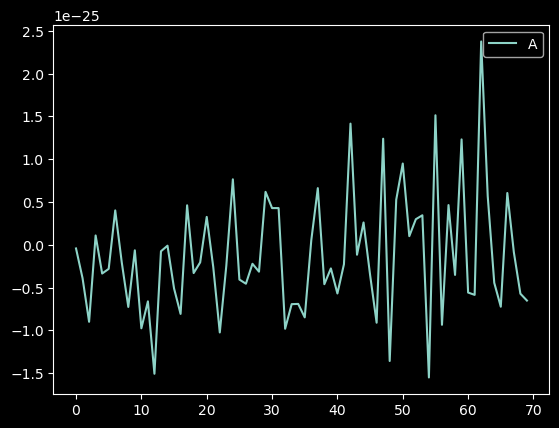

In [13]:
x, y, z, t = 10, 0, 0, 100

x_nGL, w_nGL = coeffs_GaussLegendre(n)
phis = (x_nGL + 1) * pi / 2

A0 = []
Afield0 = []
for n in range(30, 100, 1):
    n_steps = n
    Afield0.append(Afield(x, y, z, t)[0])
    A0.append(A(x, y, z, t)[0])

# plt.plot(A0)
plt.plot(Afield0)
plt.legend(['A', 'Afield'])
plt.show()